In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [76]:
data = {
    'ID': [f'ID{i:03}' for i in range(1, 801)],
    'Group': np.random.choice(['A', 'B', 'C'], size=800),
    'Feature_1': np.random.normal(2500, 150, 800),
    'Feature_2': np.random.normal(400, 15, 800),
}

df = pd.DataFrame(data)

In [77]:
def calculate_feature_3(row):
    if row['Group'] == 'A':
        return 3 * row['Feature_1'] - 5 * row['Feature_2'] + np.random.normal(0, 12)
    elif row['Group'] == 'B':
        return 2 * row['Feature_1'] + np.random.normal(0, 12)
    elif row['Group'] == 'C':
        return -row['Feature_1'] + row['Feature_2'] + np.random.normal(0, 12)

In [78]:
df['Feature_3'] = df.apply(calculate_feature_3, axis=1)

In [79]:
#Question a
total_samples = 800
greater_than_value = 3000
probability = norm.cdf(2800, loc=2500, scale=150) - norm.cdf(2200, loc=2500, scale=150)
probability_greater_than_value = 1 - norm.cdf(greater_than_value, loc=2500, scale=150)
expected_samples = probability_greater_than_value * total_samples
expected_samples

0.3432482665574277

In [80]:
#Question b
actual_count = sum(df['Feature_1'] > 3000)
actual_count

0

In [81]:
#Question c
grouped_stats = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
grouped_stats

,mean,std
Group,,
A,5506.172096,455.089692
B,5014.727012,305.153954
C,-2097.832082,156.803085


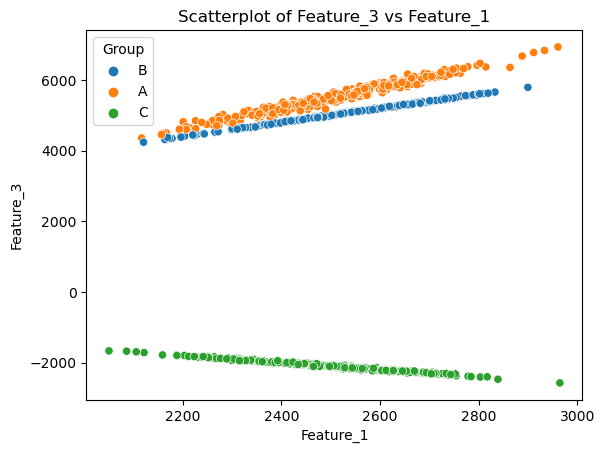

In [82]:
#Plot
sns.scatterplot(x='Feature_1', y='Feature_3', hue='Group', data=df)
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

In [83]:
df.to_csv('fake_data.csv', index=False)